# IBM Capstone Project

In [190]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

print('Libraries imported.')

Libraries imported.


if I want to buy a house, 
? what location 
? at what price
? what that include...how many bedroom or bathroom
? What is the best potencial hose style

#### 1st: Get the relationship between  each characteristic of the house with their price
#### 2nd: Draw some graph to show the relationship
####  ------ Seperate training/ testing dataset
#### ------ Find the best fit model for these data
#### 3rd: 
#### 4th: 
#### ------ Call Foursquare API get data, and relate it to the results
        Using K-mean/ DBdensity clustering alrgorithm separate category
        Find best K value for K-mean clustering then apply it to the model
#### 5th: Add marker on folium diagram for each different clustering house


### Get the city address from geocoder

In [2]:
address = 'Beijing'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City Beijing are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City Beijing are 39.906217, 116.3912757.


In [3]:
# create map of ShenZhen using latitude and longitude values
map_sz = folium.Map(location=[latitude, longitude], zoom_start=10)
map_sz

### Define foursquare credentials 

In [4]:
CLIENT_ID = 'G442UEGZJY4YOVFZJ31EGA2ZDPJ22YVT331YEMC4R2U1DYJM' # your Foursquare ID
CLIENT_SECRET = 'COI5CMEHNJAINOP1A52XD4BLBCREPM0EKRQDEUZHUWQCIHGG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G442UEGZJY4YOVFZJ31EGA2ZDPJ22YVT331YEMC4R2U1DYJM
CLIENT_SECRET:COI5CMEHNJAINOP1A52XD4BLBCREPM0EKRQDEUZHUWQCIHGG


### Get data from kaggle,


In [105]:
df_house = pd.read_csv("C:/Users/jinca/Desktop/new.csv", encoding='iso-8859-1', low_memory = False, index_col=False)

In [106]:
df_house.head()

url            id  \
0  https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1  https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2  https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3  https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4  https://bj.lianjia.com/chengjiao/101086920653....  101086920653   

          Lng        Lat            Cid   tradeTime     DOM  followers  \
0  116.475489  40.019520  1111027376244  2016-08-09  1464.0        106   
1  116.453917  39.881534  1111027381879  2016-07-28   903.0        126   
2  116.561978  39.877145  1111040862969  2016-12-11  1271.0         48   
3  116.438010  40.076114  1111043185817  2016-09-30   965.0        138   
4  116.428392  39.886229  1111027381174  2016-08-28   927.0        286   

   totalPrice  price  square livingRoom drawingRoom  kitchen bathRoom  floor  \
0       415.0  31680  131.00          2           1        1        1  ¸ß 26   
1       575.0  43436  132.38          2           2        1        2  ¸ß 22   
2      1030.0  52021  198.00          3           2        1        3   ÖÐ 4   
3       297.5  22202  134.00          3           1        1        1  µ× 21   
4       392.0  48396   81.00          2           1        1        1   ÖÐ 6   

   buildingType constructionTime  renovationCondition  buildingStructure  \
0           1.0             2005                    3                  6   
1           1.0             2004                    4                  6   
2           4.0             2005                    3                  6   
3           1.0             2008                    1                  6   
4           4.0             1960                    2                  2   

   ladderRatio  elevator  fiveYearsProperty  subway  district  \
0        0.217       1.0                0.0     1.0         7   
1        0.667       1.0                1.0     0.0         7   
2        0.500       1.0                0.0     0.0         7   
3        0.273       1.0                0.0     0.0         6   
4        0.333       0.0                1.0     1.0         1   

   communityAverage  
0           56021.0  
1           71539.0  
2           48160.0  
3           51238.0  
4           62588.0

### Data pre-processing

In [107]:
print('Shape of the dataframe is: \n', df_house.shape)
print('Columns of the dataframe include: \n', df_house.columns)

Shape of the dataframe is: 
 (318851, 26)
Columns of the dataframe include: 
 Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')


In [198]:
df = df_house[['Lat', 'Lng', 'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
              'buildingType', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty',
              'subway']] 
df = df.sample(n = 5000)             #### Only randomly get 500 samples from the 330000+ data, for quick reviewing
df.head()

Lat         Lng  totalPrice  square livingRoom drawingRoom  \
78756   39.948841  116.518485       520.0   68.79          1           1   
69418   39.953993  116.416950       910.0   66.97          2           1   
113522  40.077796  116.415742       425.0  252.70          4           2   
4474    39.991903  116.390657       386.0   62.15          2           1   
262342  39.974734  116.333303       452.0   81.53          3           1   

        kitchen bathRoom  buildingType  renovationCondition  \
78756         1        1           3.0                    4   
69418         1        1           4.0                    4   
113522        1        3           4.0                    3   
4474          1        1           1.0                    3   
262342        1        1           3.0                    4   

        buildingStructure  elevator  fiveYearsProperty  subway  
78756                   6       1.0                1.0     0.0  
69418                   2       0.0                0.0     1.0  
113522                  2       1.0                0.0     1.0  
4474                    6       1.0                1.0     1.0  
262342                  6       1.0                1.0     1.0

In [199]:
print(df.shape)
df.reset_index(drop = True, inplace=True)
df.head()

(5000, 14)


Lat         Lng  totalPrice  square livingRoom drawingRoom  kitchen  \
0  39.948841  116.518485       520.0   68.79          1           1        1   
1  39.953993  116.416950       910.0   66.97          2           1        1   
2  40.077796  116.415742       425.0  252.70          4           2        1   
3  39.991903  116.390657       386.0   62.15          2           1        1   
4  39.974734  116.333303       452.0   81.53          3           1        1   

  bathRoom  buildingType  renovationCondition  buildingStructure  elevator  \
0        1           3.0                    4                  6       1.0   
1        1           4.0                    4                  2       0.0   
2        3           4.0                    3                  2       1.0   
3        1           1.0                    3                  6       1.0   
4        1           3.0                    4                  6       1.0   

   fiveYearsProperty  subway  
0                1.0     0.0  
1                0.0     1.0  
2                0.0     1.0  
3                1.0     1.0  
4                1.0     1.0

In [200]:
df.isnull().values.sum()   ### Check how many NaN is in the data

28

In [201]:
df.dropna(axis = 0, inplace = True)    ### Clean data, drop the row with NaN value
df.shape

(4972, 14)

In [202]:
df.dtypes  ## Check type of each columns, change object to int for future analysis

Lat                    float64
Lng                    float64
totalPrice             float64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
buildingType           float64
renovationCondition      int64
buildingStructure        int64
elevator               float64
fiveYearsProperty      float64
subway                 float64
dtype: object

In [203]:
df[['livingRoom', 'drawingRoom', 'bathRoom']] = df[['livingRoom', 'drawingRoom', 'bathRoom']].astype(int)

In [204]:
#### data normalization for totalPrice, square
max_price = max(df['totalPrice'])
df['totalPrice']= df['totalPrice'] / max_price
max_square = max(df['square'])
df['square']= df['square'] / max_square

In [205]:
df_char = df[['square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'renovationCondition', 'buildingStructure',
         'elevator', 'fiveYearsProperty', 'subway'] ] 

In [206]:
df_price= df[['totalPrice']]

In [207]:
df.head()

Lat         Lng  totalPrice    square  livingRoom  drawingRoom  \
0  39.948841  116.518485    0.157576  0.151921           1            1   
1  39.953993  116.416950    0.275758  0.147902           2            1   
2  40.077796  116.415742    0.128788  0.558083           4            2   
3  39.991903  116.390657    0.116970  0.137257           2            1   
4  39.974734  116.333303    0.136970  0.180057           3            1   

   kitchen  bathRoom  buildingType  renovationCondition  buildingStructure  \
0        1         1           3.0                    4                  6   
1        1         1           4.0                    4                  2   
2        1         3           4.0                    3                  2   
3        1         1           1.0                    3                  6   
4        1         1           3.0                    4                  6   

   elevator  fiveYearsProperty  subway  
0       1.0                1.0     0.0  
1       0.0                0.0     1.0  
2       1.0                0.0     1.0  
3       1.0                1.0     1.0  
4       1.0                1.0     1.0

### Get some basic trend, relationship between each feature with the total Price of the house

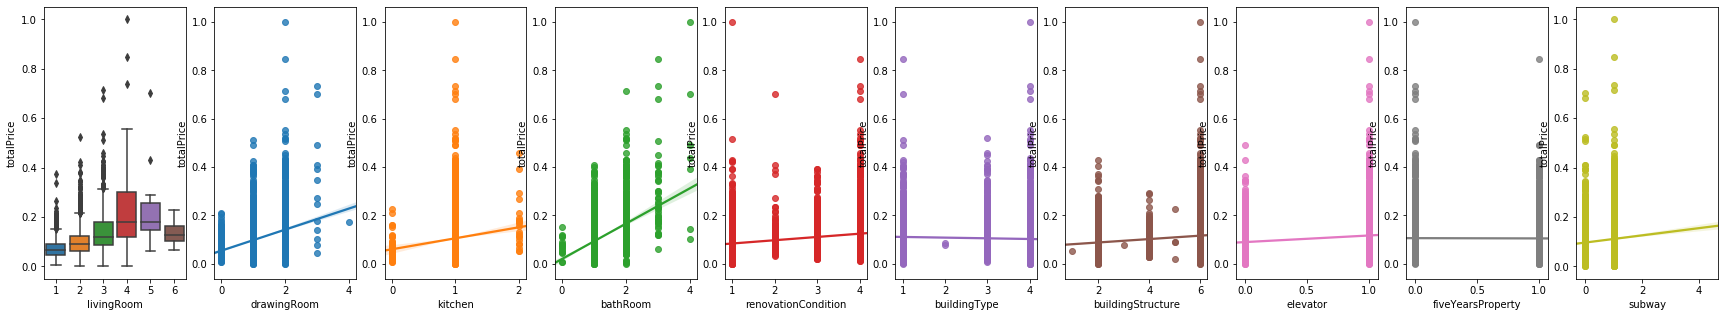

In [208]:
fig, axs = plt.subplots(ncols=10, figsize = (30,5))
sns.boxplot(x='livingRoom', y='totalPrice', data=df, ax=axs[0])
sns.regplot(x='drawingRoom', y='totalPrice', data=df, ax=axs[1])
sns.regplot(x='kitchen',y='totalPrice', data=df, ax=axs[2])
sns.regplot(x='bathRoom',y='totalPrice', data=df, ax=axs[3])
sns.regplot(x='renovationCondition',y='totalPrice', data=df, ax=axs[4])
sns.regplot(x='buildingType',y='totalPrice', data=df, ax=axs[5])
sns.regplot(x='buildingStructure',y='totalPrice', data=df, ax=axs[6])
sns.regplot(x='elevator',y='totalPrice', data=df, ax=axs[7])
sns.regplot(x='fiveYearsProperty',y='totalPrice', data=df, ax=axs[8])
sns.regplot(x='subway',y='totalPrice', data=df, ax=axs[9])

### Try SLR, simple linear regression model for the data

In [209]:
X = df_char
Y = df_price

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 3480
number of test samples: 1492


In [215]:
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_)

[[ 0.43631375  0.00502672 -0.00318931  0.01722979  0.00802389  0.00135185
   0.01254168  0.00161104  0.00614968 -0.00420746  0.0203936 ]]


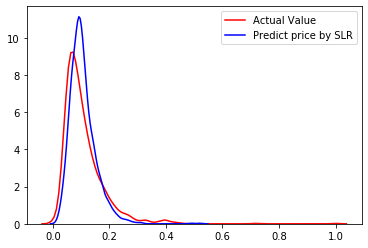

In [211]:
### predict by using x_test
yhat_lm = lm.predict(x_test)
ax1 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_lm, hist=False, color = "b", label ="Predict price by SLR", ax=ax1)

In [216]:
print('MSE for SLR is: ', mean_squared_error(y_test, yhat_lm))
print('R score for SLR is: ', lm.score(x_test, y_test))

MSE for SLR is:  0.0029220633013945473
R score for SLR is:  0.4295171645221977


### Try PolyRegression

In [248]:
Rsqu_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	x_train_pr =pr.fit_transform(x_train)
	x_test_pr = pr.fit_transform(x_test)
	lm.fit(x_train_pr, y_train)
	Rsqu_test.append(lm.score(x_test_pr, y_test))
print('R square score for different polynomial orders are: ',Rsqu_test)
print('The best polynomial score is: 2')

R square score for different polynomial orders are:  [0.42347864452138945, 0.46004592050051785, -0.5271943757625226, -460105.5536596257]
The best polynomial score is: 2


### Try ridge model

MSE for RidgeModel is:  0.0029532257602230302
R score for RidgeModel is:  0.42343322792012317


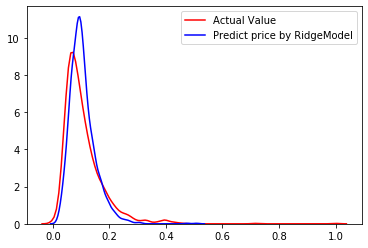

In [231]:
RidgeModel = Ridge(alpha = 0.01)
RidgeModel.fit(x_train,y_train)
yhat_ridge = RidgeModel.predict(x_test)


print('MSE for RidgeModel is: ', mean_squared_error(y_test, yhat_ridge))
print('R score for RidgeModel is: ', RidgeModel.score(x_test, y_test))

### predict by using x_test
ax2 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

### For polynomial ridgeModel

MSE for RidgeModel-poly is:  0.0027245331887289855
R score for RidgeModel-poly is:  0.4680815374130656


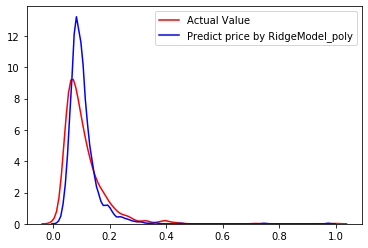

In [249]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_poly = Ridge(alpha = 0.1)
RidgeModel_poly.fit(x_train_pr, y_train)
yhat_ridge_poly = RidgeModel_poly.predict(x_test_pr)

print('MSE for RidgeModel-poly is: ', mean_squared_error(y_test, yhat_ridge_poly))
print('R score for RidgeModel-poly is: ', RidgeModel_poly.score(x_test_pr, y_test))

### predict by using x_test
ax3 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge_poly, hist=False, color = "b", label ="Predict price by RidgeModel_poly", ax=ax3)

In [270]:
df1 = df.sample(n = 100) 

### Call Foursquare API, get response from it. 

In [277]:
LIMIT = 100
ridus = 500

In [314]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)


In [317]:

results = requests.get(url).json()
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5f2cf8b11375183f48f39c27'},
 'response': {}}

In [284]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [285]:

nearby_venues = json_normalize(results) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name     categories        lat         lng
0              Tian'anmen Tower (天安门城楼)  Historic Site  39.906562  116.391582
1                                    端门  Historic Site  39.908694  116.391192
2             Tian'anmen Square (天安门广场)          Plaza  39.904848  116.391306
3  Zhongshan Park (Zhongshan Park 中山公园)           Park  39.908765  116.388602
4     中山音乐堂 Forbidden City Concert Hall   Concert Hall  39.909374  116.389439

In [320]:
def getNearbyVenues(totalPrice, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for price, lat, lng in zip(totalPrice, latitudes, longitudes):
           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            price,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'HousePrice',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [321]:
## 14
LIMIT = 100
Beijing_venues = getNearbyVenues(totalPrice = df1['totalPrice'],latitudes=df1['Lat'],longitudes=df1['Lng'])

KeyError: 'groups'

In [294]:
print(Beijing_venues.shape)
Beijing_venues.head(10)

(468, 6)


Neighborhood Latitude  Neighborhood Longitude  \
0              39.905367              116.493655   
1              39.905367              116.493655   
2              39.905367              116.493655   
3              39.905367              116.493655   
4              39.950488              116.303130   
5              39.950488              116.303130   
6              39.950488              116.303130   
7              39.950488              116.303130   
8              39.950488              116.303130   
9              39.950488              116.303130   

                               Venue  Venue Latitude  Venue Longitude  \
0                       UNIQLO (优衣库)       39.907536       116.494626   
1                        瀚金佰九号温泉国际酒店       39.904358       116.496377   
2              Holiland Bakery (好利来)       39.907828       116.494453   
3  Sihui Public Transit Hub (四惠交通枢纽)       39.907899       116.489746   
4                cucuk cucuk beijing       39.950808       116.300626   
5          超市发 Chaoshifa Supermarket       39.947292       116.301998   
6              北京外国语大学主楼旁边那棵好漂亮的黄叶子树       39.954193       116.304443   
7                              台湾手抓饼       39.954017       116.301151   
8                         BFSU Hotel       39.954551       116.302310   
9      四季民福苏州街店 Sijiminfu Roast duck       39.952156       116.297766   

       Venue Category  
0      Clothing Store  
1          Hot Spring  
2              Bakery  
3         Bus Station  
4  Beijing Restaurant  
5    Department Store  
6                Park  
7          Food Truck  
8               Hotel  
9  Beijing Restaurant

#### Wait for: 
#### 1: Add column price and other livingroom, bathroom ...data to the Beijing_venues
#### 2: Using k-mean clustering analysis the data ,
#### 3: Add maker on folium by using Foursquare API

### Add maker to the folium diagram

In [327]:
# create map of Manhattan using latitude and longitude values
map_beijing = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, price in zip(df['Lat'], df['Lng'], df['totalPrice']):
    label = folium.Popup(price, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_beijing)  
    
map_beijing